In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

qualifying = pd.read_csv('qualifying.csv', encoding="utf-8")
results = pd.read_csv('results.csv', encoding="utf-8")

qualifying.head()


,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [2]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [3]:
my_quali = pd.merge(qualifying, results, on=['raceId', 'driverId', 'constructorId'], how = 'left')
my_quali.rename(columns = {'milliseconds': 'race_time'}, inplace = True)
my_quali.head()

,qualifyId,raceId,driverId,constructorId,number_x,position_x,q1,q2,q3,resultId,...,positionOrder,points,laps,time,race_time,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714,1.0,...,1.0,10.0,58.0,1:34:50.616,5690616,39,2,1:27.452,218.300,1.0
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869,9.0,...,9.0,0.0,47.0,\N,\N,15,9,1:28.753,215.100,4.0
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079,5.0,...,5.0,4.0,58.0,+18.014,5708630,43,1,1:27.418,218.385,1.0
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178,13.0,...,13.0,0.0,29.0,\N,\N,23,6,1:28.175,216.510,5.0
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236,2.0,...,2.0,8.0,58.0,+5.478,5696094,41,3,1:27.739,217.586,1.0


In [4]:
# retain only the columns we need 
selected_columns = ['raceId', 'driverId', 'constructorId', 'q1', 'q2', 'q3', 'race_time', 'grid', 'position_x']
quali = my_quali[selected_columns]

quali.head()

,raceId,driverId,constructorId,q1,q2,q3,race_time,grid,position_x
0,18,1,1,1:26.572,1:25.187,1:26.714,5690616,1.0,1
1,18,9,2,1:26.103,1:25.315,1:26.869,\N,2.0,2
2,18,5,1,1:25.664,1:25.452,1:27.079,5708630,3.0,3
3,18,13,6,1:25.994,1:25.691,1:27.178,\N,4.0,4
4,18,2,2,1:25.960,1:25.518,1:27.236,5696094,5.0,5


In [5]:
# remove missing values
quali = quali.copy()

quali.replace('\\N', np.nan, inplace=True)
quali.dropna(inplace=True)
quali.head()

,raceId,driverId,constructorId,q1,q2,q3,race_time,grid,position_x
0,18,1,1,1:26.572,1:25.187,1:26.714,5690616,1.0,1
2,18,5,1,1:25.664,1:25.452,1:27.079,5708630,3.0,3
4,18,2,2,1:25.960,1:25.518,1:27.236,5696094,5.0,5
6,18,3,3,1:26.295,1:26.059,1:28.687,5698779,7.0,7
23,19,8,6,1:35.645,1:34.188,1:36.230,5478555,2.0,2


In [6]:
# need to convert the q1, q2, and q3 times to milliseconds because we can't analyze them in the current  format

def time_format(time_str):
    # Check if the input is a string
    if not isinstance(time_str, str):
        return None

    # Check if both ":" and "." are present in the string
    if ':' in time_str and '.' in time_str:
        minutes, rest = time_str.split(':')
        seconds, milliseconds = rest.split('.')
        total_milliseconds = int(minutes) * 60000 + int(seconds) * 1000 + int(milliseconds)
    else:
        # Return NaN or a placeholder value for rows that don't match the expected format
        total_milliseconds = None
    return total_milliseconds




In [7]:
# Convert columns to milliseconds
quali['q1'] = quali['q1'].apply(time_format)
quali['q2'] = quali['q2'].apply(time_format)
quali['q3'] = quali['q3'].apply(time_format)

quali.head()

,raceId,driverId,constructorId,q1,q2,q3,race_time,grid,position_x
0,18,1,1,86572,85187,86714,5690616,1.0,1
2,18,5,1,85664,85452,87079,5708630,3.0,3
4,18,2,2,85960,85518,87236,5696094,5.0,5
6,18,3,3,86295,86059,88687,5698779,7.0,7
23,19,8,6,95645,94188,96230,5478555,2.0,2


In [8]:
print(quali['race_time'].dtype)
quali['race_time'] = quali['race_time'].astype(int)
print(quali['race_time'].dtype)

object
int64


In [13]:
# This Cell needs to be fixed , for now, run it twice so that you don't see the plots from the pitstops ipynb
import import_ipynb
from Pitstops import plot_histograms

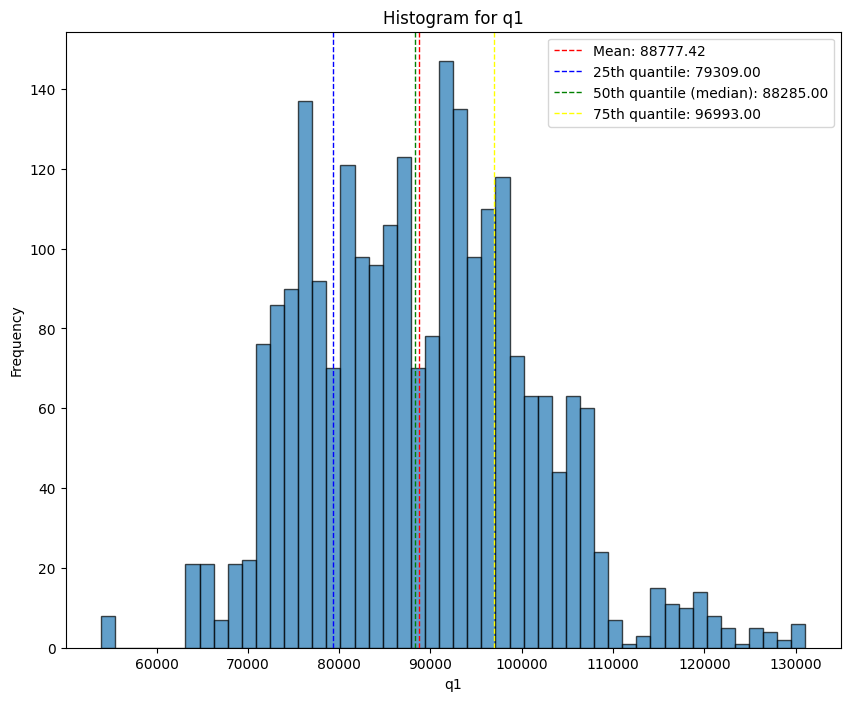

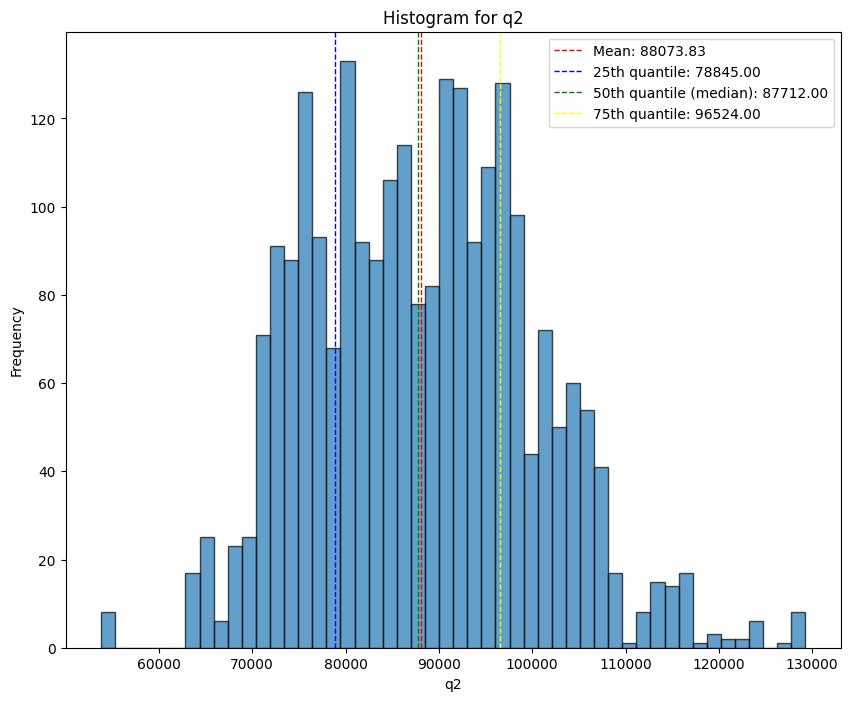

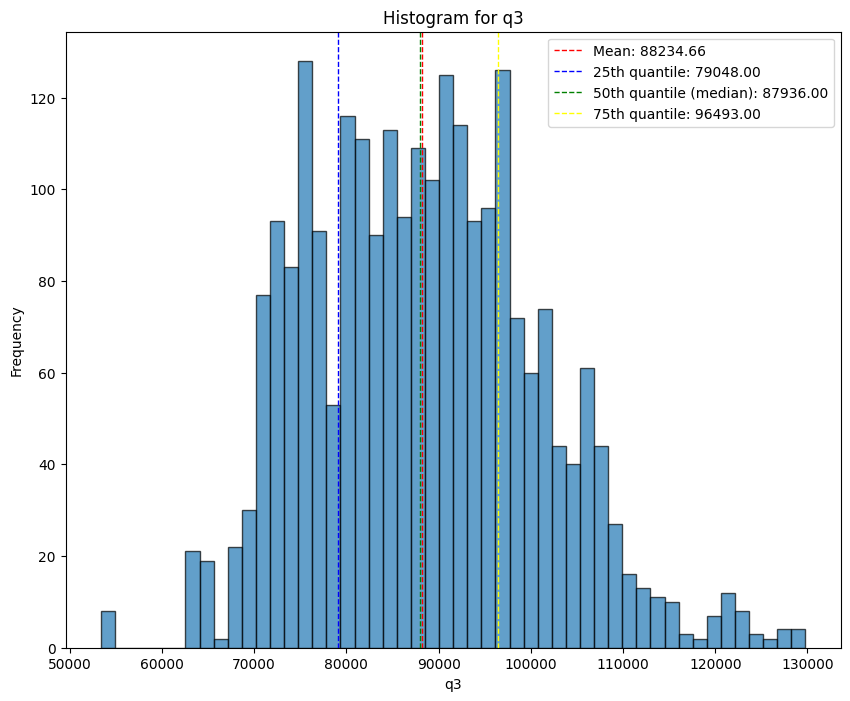

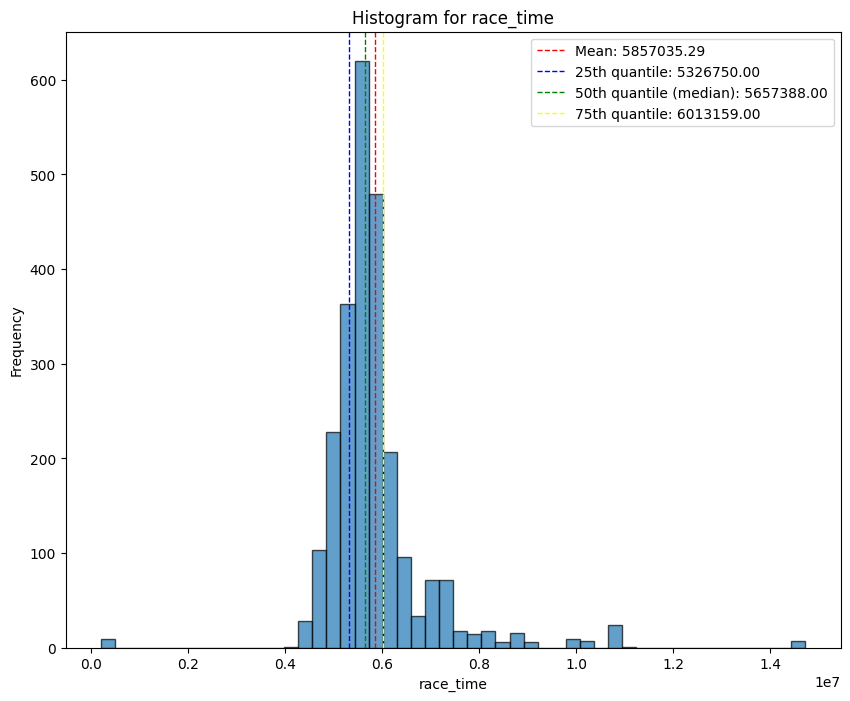

In [10]:
result = plot_histograms(quali, exclude_columns=['raceId', 'driverId', 'constructorId', 'position_x', 'grid'])

In [11]:
quali.describe()

,raceId,driverId,constructorId,q1,q2,q3,race_time,grid,position_x
count,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2.433000e+03,2433.000000,2433.000000
mean,750.288533,326.534320,43.574188,88777.418413,88073.831073,88234.656802,5.857035e+06,4.992602,4.865598
std,396.923882,396.584313,66.396526,12260.075374,12013.749200,12329.721774,1.118071e+06,3.090591,2.739442
min,1.000000,1.000000,1.000000,53904.000000,53787.000000,53377.000000,2.070710e+05,0.000000,1.000000
25%,352.000000,5.000000,4.000000,79309.000000,78845.000000,79048.000000,5.326750e+06,2.000000,2.000000
50%,930.000000,20.000000,9.000000,88285.000000,87712.000000,87936.000000,5.657388e+06,5.000000,5.000000
75%,1025.000000,822.000000,117.000000,96993.000000,96524.000000,96493.000000,6.013159e+06,7.000000,7.000000
max,1115.000000,859.000000,214.000000,131081.000000,129272.000000,129776.000000,1.472999e+07,24.000000,14.000000


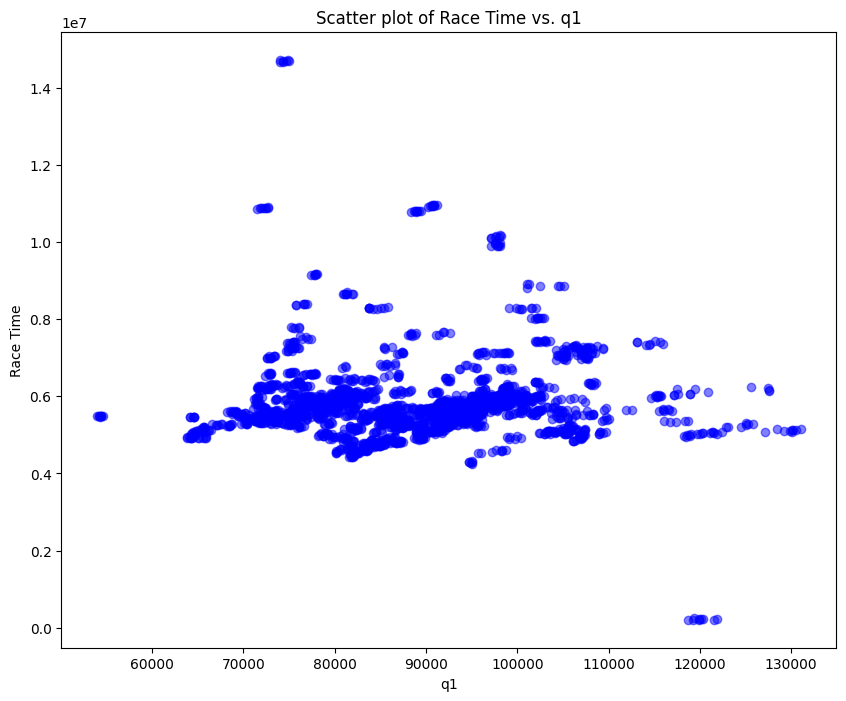

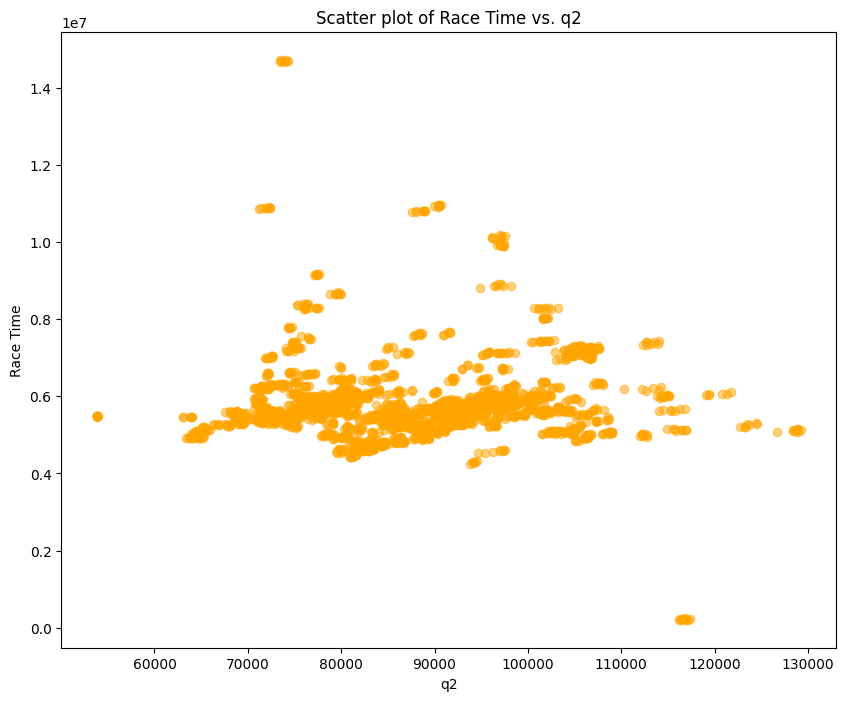

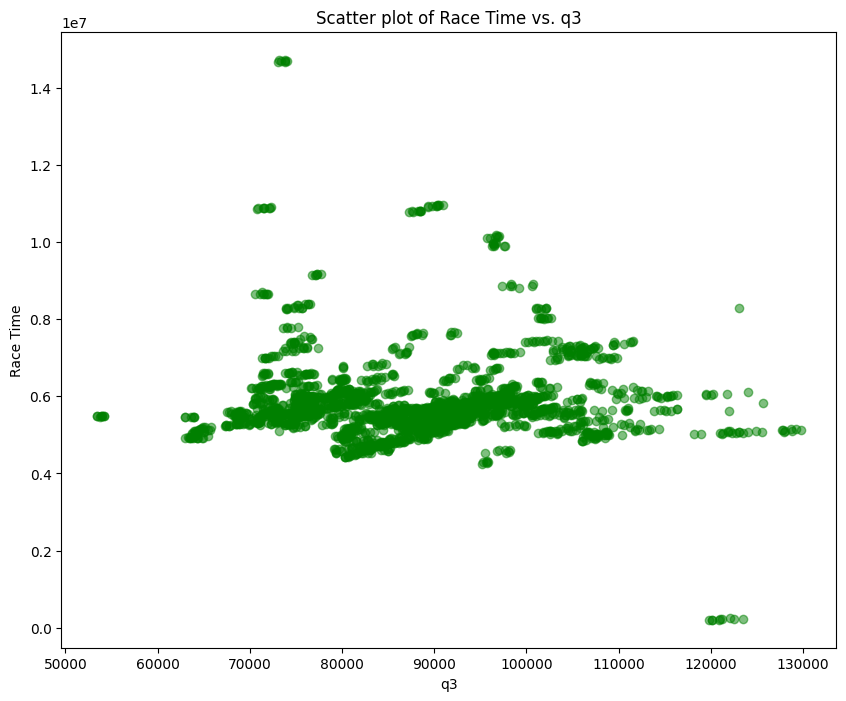

In [16]:
# List of columns to plot against race time
except_col = {'raceId', 'driverId', 'constructorId', 'position_x', 'grid', 'race_time'} # Don't make plots of these columns
columns_to_plot = [col for col in quali.columns if col not in except_col]

colour = ['blue', 'orange', 'green']

for col, col_color in zip(columns_to_plot, colour):
    plt.figure(figsize = (10, 8))  
    plt.scatter(quali[col], quali['race_time'], color = col_color, alpha = 0.5, )
    plt.title(f'Scatter plot of Race Time vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Race Time')
    plt.show()